#### Set Up

In [1]:
## imports and dependencies

# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# models 
from sklearn.ensemble import GradientBoostingRegressor

# train test split
from sklearn.model_selection import train_test_split

# scaling
from sklearn.preprocessing import StandardScaler

# PCA
from sklearn.decomposition import PCA

# accuracy
from sklearn.metrics import mean_absolute_error

#### Data

In [2]:
# data
df = pd.read_csv("region_dataset.csv")

In [3]:
# feature reduction
df = df.drop(['Name', 'Weekly Gross', 'Total Gross', 'Annual Gross', 'Weekly Net', 'Annual Net', 'Ln Annual Net', 'AgeSQ', 'Gen Pos_D', 'Gen Pos_M', 'Gen Pos_F'], axis=1)

#### Pre Processing

In [4]:
# parameters and target
x = df.drop('Ln Weekly Gross', axis=1)
y = df['Ln Weekly Gross']

In [5]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [6]:
# scale
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [7]:
# PCA
pca = PCA(n_components=0.9) 
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

#### Models

In [8]:
# Gradient Boosting Scaled
gb_scaled = GradientBoostingRegressor()
gb_scaled.fit(x_train_scaled, y_train)
y_pred_scaled = gb_scaled.predict(x_test_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
print("Mean Absolute Error (Scaled):", mae_scaled)

Mean Absolute Error (Scaled): 0.3670195144734497


In [9]:
# Gradient Boosting PCA 
gb_pca = GradientBoostingRegressor()
gb_pca.fit(x_train_pca, y_train)
y_pred_pca = gb_pca.predict(x_test_pca)
mae_pca = mean_absolute_error(y_test, y_pred_pca)
print("Mean Absolute Error (PCA):", mae_pca)

Mean Absolute Error (PCA): 0.49838492781766397


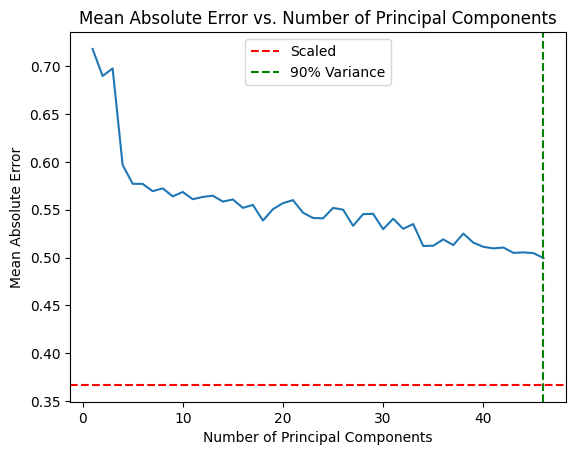

In [10]:
# Compare the performance of different numbers of principal components
num_components = range(1, pca.n_components_ + 1)
mae_values = []

for n in num_components:
    pca = PCA(n_components=n)
    x_train_pca = pca.fit_transform(x_train_scaled)
    x_test_pca = pca.transform(x_test_scaled)

    gb = GradientBoostingRegressor()
    gb.fit(x_train_pca, y_train)
    y_pred = gb.predict(x_test_pca)

    mae = mean_absolute_error(y_test, y_pred)
    mae_values.append(mae)

# Plot the mean absolute error vs. number of principal components
plt.plot(num_components, mae_values)
plt.xlabel("Number of Principal Components")
plt.ylabel("Mean Absolute Error")
plt.title("Mean Absolute Error vs. Number of Principal Components")
plt.axhline(y=mae_scaled, color='r', ls='--', label='Scaled')
plt.axvline(x=pca.n_components_, color='g', ls='--', label='90% Variance')
plt.legend()
plt.show()

In [11]:
num_components[mae_values.index(min(mae_values))], min(mae_values)

(46, 0.49955538711518)

In [12]:
mae_values

[0.7180321613343454,
 0.6897256641202064,
 0.6976371744474824,
 0.5968571768237817,
 0.5771540258543233,
 0.5769993455206579,
 0.5694088984880178,
 0.5723553539242286,
 0.5640198955368657,
 0.5685653116215199,
 0.5610311907265491,
 0.5634082904610315,
 0.5647128980161071,
 0.5585566631474551,
 0.5607860999643413,
 0.5519831145991635,
 0.5550608276452268,
 0.5387273836124769,
 0.5506343843527977,
 0.5568908293289875,
 0.5600786568053446,
 0.5469195945735356,
 0.541437532981529,
 0.541019676389863,
 0.5519167249874439,
 0.5501083233147842,
 0.533247540401221,
 0.5454445534533792,
 0.5457561080605503,
 0.5296628545022909,
 0.540614983655458,
 0.5301174048799543,
 0.535076053307152,
 0.5121417890770348,
 0.5124389897121672,
 0.5190804974997373,
 0.5130935037496689,
 0.5251271451242284,
 0.5156570476322808,
 0.5113017260010531,
 0.5096564576147751,
 0.5105693178847853,
 0.5049587400642899,
 0.5055045273373581,
 0.5046851964551295,
 0.49955538711518]